In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

from imripy import constants as c, kepler, merger_system as ms, inspiral, halo, plot_utils as pu
from imripy.inspiral import forces
from imripy.kepler import KeplerOrbit

## Define 2 body system

In [2]:
m1 = 1e3 * c.solar_mass_to_pc
m2 = 1. * c.solar_mass_to_pc

hs = ms.HostSystem(m1)

In [3]:
a0 = 100. * hs.r_isco
e0 = 0.2
k0 = KeplerOrbit(hs, m2, a0, e0)

## Relativistic Precession

The relativistic precession is calculated with 

$\dot{\omega} = 6\pi \frac{m}{a(1-e^2)}$

The periapse angle is evolved by setting the option periapsePrecession=True

In [4]:
opt_rp = inspiral.Classic.EvolutionOptions( dissipativeForces=[inspiral.forces.GWLoss()],
                                          periapsePrecession=True)

ev_rp = inspiral.Classic.Evolve(hs, k0, opt=opt_rp)

Evolving from  100.0  to  1.0 r_isco  with initial eccentricity 0.2  with  Options: dissipative forces employed {GWLoss, }, accuracy = 1.0e-10, with periapse precession
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 0.1181s real time


In [5]:
# The result of the integration in radians
ev_rp.periapse_angle 

array([0.00000000e+00, 5.27046396e-01, 5.79752350e+00, 5.85036089e+01,
       5.85695947e+02, 5.87082176e+03, 2.83996681e+04, 5.89318355e+04,
       9.37463312e+04, 1.31308575e+05, 1.70756707e+05, 2.11528256e+05,
       2.53223440e+05, 2.95542434e+05, 3.38252075e+05, 3.81166329e+05,
       4.24133943e+05, 4.67030189e+05, 5.09751096e+05, 5.52209280e+05,
       5.94330833e+05, 6.36052957e+05, 6.77322119e+05, 7.18092600e+05,
       7.58325323e+05, 7.97986909e+05, 8.37048898e+05, 8.75487102e+05,
       9.13281072e+05, 9.50413638e+05, 9.86870530e+05, 1.02264004e+06,
       1.05771276e+06, 1.09208131e+06, 1.12574015e+06, 1.15868537e+06,
       1.19091456e+06, 1.22242665e+06, 1.25322176e+06, 1.28330114e+06,
       1.31266702e+06, 1.34132255e+06, 1.36927170e+06, 1.39651922e+06,
       1.42307051e+06, 1.44893164e+06, 1.47410924e+06, 1.49861045e+06,
       1.52244290e+06, 1.54561467e+06, 1.56813422e+06, 1.59001038e+06,
       1.61125229e+06, 1.63186941e+06, 1.65187145e+06, 1.67126837e+06,
      

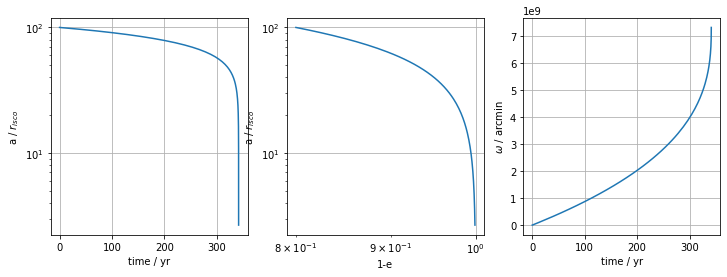

In [6]:
fig, axs = plt.subplots(1,3, figsize=(12,4))

pu.plotEvolution(hs, ev_rp, ax_a=axs[0], ax_1mea=axs[1], ax_pa=axs[2])
axs[0].set_xlabel("time / yr"); axs[0].set_ylabel("a / $r_{isco}$"); axs[0].set_xscale('linear')
axs[1].set_xlabel("1-e"); axs[1].set_ylabel("a / $r_{isco}$")
axs[2].set_xlabel("time / yr"); axs[2].set_ylabel("$\omega$ / arcmin")
for ax in axs:
    ax.grid()

## Mass precession

The mass precession is calculated from the halo mass in the HostSystem object

We can turn off the relativistic precession with the option relativisticPrecession=False
Then, only the mass precession is calculated.

In [7]:
# Example DM spike
r_spike = 0.54 
alpha = 7./3.
rho_spike = 226. * c.solar_mass_to_pc  
spike = halo.Spike(rho_spike, r_spike, alpha)

In [8]:
hs.halo = spike

opt_mp = inspiral.Classic.EvolutionOptions( dissipativeForces=[inspiral.forces.GWLoss()],
                                          periapsePrecession=True, relativisticPrecession=False)

ev_mp = inspiral.Classic.Evolve(hs, k0, opt=opt_mp)

Evolving from  100.0  to  1.0 r_isco  with initial eccentricity 0.2  with  Options: dissipative forces employed {GWLoss, }, accuracy = 1.0e-10, with periapse precession
A termination event occurred.
 -> Ended at 2.667e+00r_isco. Evolution took 0.2114s real time


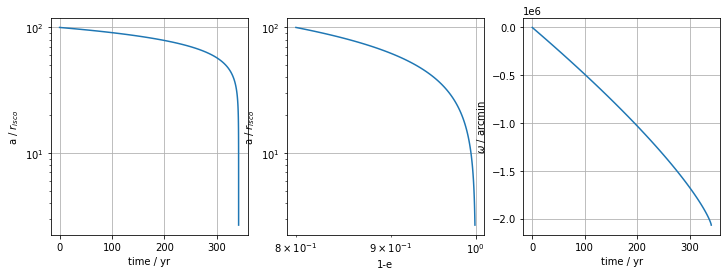

In [9]:
fig, axs = plt.subplots(1,3, figsize=(12,4))

pu.plotEvolution(hs, ev_mp, ax_a=axs[0], ax_1mea=axs[1], ax_pa=axs[2])
axs[0].set_xlabel("time / yr"); axs[0].set_ylabel("a / $r_{isco}$"); axs[0].set_xscale('linear')
axs[1].set_xlabel("1-e"); axs[1].set_ylabel("a / $r_{isco}$")
axs[2].set_xlabel("time / yr"); axs[2].set_ylabel("$\omega$ / arcmin")
for ax in axs:
    ax.grid()

## Comparison 

We will compare to 2111.13514 Fig 1.

In [10]:
# Example DM spike
spike_73 = halo.Spike(rho_spike, r_spike, 7./3.)
spike_52 = halo.Spike(rho_spike, r_spike, 5./2.)
spike_94 = halo.Spike(rho_spike, r_spike, 9./4.)

In [11]:
p0 = 1e6 * 2*m1
e0 = 0.6
a0 = p0 / (1-e0**2)
k0 = KeplerOrbit(hs, m2, a0, e0)
T = k0.T 

In [12]:
# With these options we have both mass precession and relativistic precession,
#  but mass precession dominates in this case
opt = inspiral.Classic.EvolutionOptions( dissipativeForces=[inspiral.forces.GWLoss(), inspiral.forces.DynamicalFriction()],
                                          periapsePrecession=True)

hs.halo = spike_73
ev_73 = inspiral.Classic.Evolve(hs, k0, t_fin=10.*T, opt=opt) # Only evolve for 10 orbits

hs.halo = spike_52
ev_52 = inspiral.Classic.Evolve(hs, k0, t_fin=10.*T, opt=opt)

hs.halo = spike_94
ev_94 = inspiral.Classic.Evolve(hs, k0, t_fin=10.*T, opt=opt)

Evolving from  520833.3333333333  to  1.0 r_isco  with initial eccentricity 0.6  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10, with periapse precession
The solver successfully reached the end of the integration interval.
 -> Ended at 5.203e+05r_isco. Evolution took 0.0869s real time
Evolving from  520833.3333333333  to  1.0 r_isco  with initial eccentricity 0.6  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10, with periapse precession
The solver successfully reached the end of the integration interval.
 -> Ended at 5.188e+05r_isco. Evolution took 0.0832s real time
Evolving from  520833.3333333333  to  1.0 r_isco  with initial eccentricity 0.6  with  Options: dissipative forces employed {GWLoss, DynamicalFriction, }, accuracy = 1.0e-10, with periapse precession
The solver successfully reached the end of the integration interval.
 -> Ended at 5.206e+05r_isco. Evolution took 0.0636s real time


In [13]:
def get_phi(ev):
    def phi_dot(t, phi):  # The orbital phase evolution according to Maggiore (2007)
        return np.sqrt(ev.m_tot/ev.a_int(t)**3) * (1. - ev.e_int(t)**2)**(-3./2.) * (1. + ev.e_int(t)*np.cos(phi))**2

    sol = solve_ivp(phi_dot, [ev.t[0], ev.t[-1]], [0.], t_eval=ev.t, atol=1e-10, rtol=1e-10)
    ev.phi = sol.y[0]

get_phi(ev_73)
get_phi(ev_52)
get_phi(ev_94)

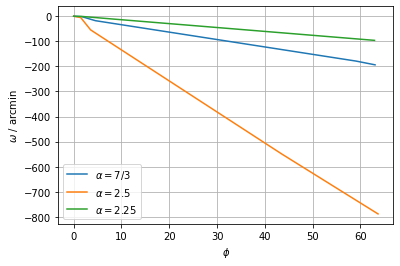

In [14]:
plt.plot(ev_73.phi, ev_73.periapse_angle*c.rad_to_arcmin, label=r"$\alpha=7/3$")
plt.plot(ev_52.phi, ev_52.periapse_angle*c.rad_to_arcmin, label=r"$\alpha=2.5$")
plt.plot(ev_94.phi, ev_94.periapse_angle*c.rad_to_arcmin, label=r"$\alpha=2.25$")

plt.xlabel("$\phi$")
plt.ylabel("$\omega$ / arcmin")
plt.grid(); plt.legend()